## This notebook assumes you have the following packages installed in your conda environment.

In [300]:
import pandas as pd
import json
import community
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import random
import numpy as np
import randomcolor

In [301]:
df_default = pd.read_csv('scripts-data/default-nd.csv')
df_default.shape


FileNotFoundError: [Errno 2] File b'scripts-data/default-nd.csv' does not exist: b'scripts-data/default-nd.csv'

In [ ]:
df_default["Code"].values

## Community Analysis

In [302]:
edges_df = pd.read_csv('scripts-data/default-neighbors.csv')
edges_df = edges_df.rename(columns={"neighbor": "source"})
edges_df.head()


FileNotFoundError: [Errno 2] File b'scripts-data/default-neighbors.csv' does not exist: b'scripts-data/default-neighbors.csv'

In [ ]:
edges_df.shape

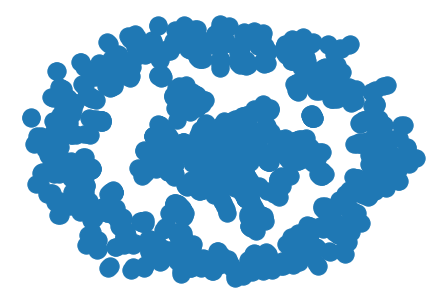

In [303]:
g = nx.from_pandas_edgelist(edges_df, source='source', target='target') 
nx.draw(g)

In [304]:
#first compute the best partition
from networkx.algorithms.community import greedy_modularity_communities
G = g

#Two methods for community analysis
c = greedy_modularity_communities(G)
partition = community.best_partition(G)

In [305]:
len(c)

274

In [306]:
num_nodes = 0
for community in c:
    num_nodes += len(community)
print(num_nodes)

1920


In [307]:
len(partition)

1920

In [308]:
#Noes only connected by edges. Does not include standalone nodes.

list = partition.items()
print(len(list))
df_with_groupids = pd.DataFrame(list, columns=['Code', 'group_id'])
df_with_groupids.head()

1920


,Code,group_id
0,B_01_062,0
1,A_01_002,0
2,C_03_023,0
3,F_02_088,0
4,H_03_004,0


In [309]:
# get edges only where source and target nodes belong to a valid community for now. This is to assign them group ids.
nodes_in_communities = df_with_groupids['Code'].unique()
edges_for_community_nodes_df = edges_df.loc[edges_df['source'].isin(nodes_in_communities) & edges_df['target'].isin(nodes_in_communities)]
print(len(edges_for_community_nodes_df['source'].unique()))
print(edges_df.shape)
print(edges_for_community_nodes_df.shape)
edges_for_community_nodes_df.head()

1920
(13250, 6)
(13250, 6)


,target,source,num_matched_features,matched_features,num_missed_features,missed_features
0,A_01_002,B_01_062,13,"SelectedFingers.2.0, Flexion.2.0, FlexionChang...",0,NaN
1,A_01_002,C_03_023,12,"SelectedFingers.2.0, FlexionChange.2.0, Spread...",1,Flexion.2.0
2,A_01_002,F_02_088,12,"Flexion.2.0, FlexionChange.2.0, Spread.2.0, Sp...",1,SelectedFingers.2.0
3,A_01_002,H_03_004,12,"SelectedFingers.2.0, Flexion.2.0, FlexionChang...",1,ThumbPosition.2.0
4,A_01_002,J_03_046,13,"SelectedFingers.2.0, Flexion.2.0, FlexionChang...",0,NaN


In [310]:
df_merged = pd.merge(df_default, df_with_groupids,how='left', on=['Code'])
print(df_merged.shape)
df_merged.head()

(2728, 172)


,EntryID,LemmaID,Code,YouTube Video,SignFrequency(M),SignFrequency(SD),SignFrequency(Z),SignFrequency(N),PercentUnknown,SignFrequency(M-Native),...,H index,SignBankID,Parameter.Neighborhood.Density.2.0,Neighborhood Density 2.0,Parameter.Neighborhood.Density.2.0.1,Neighborhood Density 2.0.1,DominantTranslation,SignBankID.1,Neighborhood Density,group_id
0,arms-cross,arms-cross,J_01_098,NaN,3.467,2.177,-0.458,30,0,3.400,...,NaN,arms-cross\t,0,3,0,3,NaN,arms-cross\t,0,NaN
1,raise-hand,raise-hand,H_02_048,NaN,5.154,1.891,0.544,28,0,5.500,...,NaN,raise-hand\t,0,3,0,3,NaN,raise-hand\t,0,NaN
2,sigh,sigh,H_03_086,NaN,3.931,1.751,-0.196,30,0,3.267,...,NaN,sigh\t,0,3,0,3,NaN,sigh\t,0,NaN
3,1_dollar,1_dollar,C_02_025,NaN,3.034,1.500,-0.775,29,0,2.944,...,NaN,DOLLAR,9,0,9,0,NaN,DOLLAR,0,NaN
4,5_dollars,5_dollars,B_01_062,NaN,5.120,1.716,0.302,25,0,5.214,...,-0.2,FIVE-DOLLARS,8,4,8,4,NaN,FIVE-DOLLARS,5,0.0


In [311]:
#Will assign all NaN's same color for now. That's okay.

df_merged.head()
unique_community_ids = df_merged['group_id'].unique()
color_dict = []
for groupid in unique_community_ids:
    #generate a random color
    color = randomcolor.RandomColor().generate()[0]
    color_dict.append({'group_id': groupid, 'color_code': color})
    
color_dict

[{'group_id': nan, 'color_code': '#e585ad'},
 {'group_id': 0.0, 'color_code': '#12edcc'},
 {'group_id': 130.0, 'color_code': '#06117a'},
 {'group_id': 168.0, 'color_code': '#5af422'},
 {'group_id': 117.0, 'color_code': '#0eb763'},
 {'group_id': 240.0, 'color_code': '#43d872'},
 {'group_id': 128.0, 'color_code': '#ed6dbe'},
 {'group_id': 52.0, 'color_code': '#b3e4ef'},
 {'group_id': 198.0, 'color_code': '#02d85b'},
 {'group_id': 125.0, 'color_code': '#7163d8'},
 {'group_id': 166.0, 'color_code': '#fcc7fa'},
 {'group_id': 41.0, 'color_code': '#fcaec1'},
 {'group_id': 87.0, 'color_code': '#ffadcf'},
 {'group_id': 167.0, 'color_code': '#83ea91'},
 {'group_id': 60.0, 'color_code': '#a901bf'},
 {'group_id': 2.0, 'color_code': '#e25644'},
 {'group_id': 12.0, 'color_code': '#ef6499'},
 {'group_id': 176.0, 'color_code': '#817ed3'},
 {'group_id': 254.0, 'color_code': '#e8a2cb'},
 {'group_id': 103.0, 'color_code': '#747cdb'},
 {'group_id': 86.0, 'color_code': '#fcf414'},
 {'group_id': 127.0, 'col

In [312]:
color_df = pd.DataFrame(color_dict)
df_merged_with_color = pd.merge(df_merged, color_df,how='left', on=['group_id'])
print(df_merged_with_color.shape)
df_merged_with_color.head()


(2728, 173)


,EntryID,LemmaID,Code,YouTube Video,SignFrequency(M),SignFrequency(SD),SignFrequency(Z),SignFrequency(N),PercentUnknown,SignFrequency(M-Native),...,SignBankID,Parameter.Neighborhood.Density.2.0,Neighborhood Density 2.0,Parameter.Neighborhood.Density.2.0.1,Neighborhood Density 2.0.1,DominantTranslation,SignBankID.1,Neighborhood Density,group_id,color_code
0,arms-cross,arms-cross,J_01_098,NaN,3.467,2.177,-0.458,30,0,3.400,...,arms-cross\t,0,3,0,3,NaN,arms-cross\t,0,NaN,#e585ad
1,raise-hand,raise-hand,H_02_048,NaN,5.154,1.891,0.544,28,0,5.500,...,raise-hand\t,0,3,0,3,NaN,raise-hand\t,0,NaN,#e585ad
2,sigh,sigh,H_03_086,NaN,3.931,1.751,-0.196,30,0,3.267,...,sigh\t,0,3,0,3,NaN,sigh\t,0,NaN,#e585ad
3,1_dollar,1_dollar,C_02_025,NaN,3.034,1.500,-0.775,29,0,2.944,...,DOLLAR,9,0,9,0,NaN,DOLLAR,0,NaN,#e585ad
4,5_dollars,5_dollars,B_01_062,NaN,5.120,1.716,0.302,25,0,5.214,...,FIVE-DOLLARS,8,4,8,4,NaN,FIVE-DOLLARS,5,0.0,#12edcc


In [313]:
df_merged_with_color.shape

(2728, 173)

In [314]:
#Need only 3 columsn for now
df_node_graph_json_data = df_merged_with_color[["EntryID", "Code", "group_id", "color_code", "SignFrequency(Z)"]]
print(df_node_graph_json_data.shape)
df_node_graph_json_data.head(20)


(2728, 5)


,EntryID,Code,group_id,color_code,SignFrequency(Z)
0,arms-cross,J_01_098,NaN,#e585ad,-0.458
1,raise-hand,H_02_048,NaN,#e585ad,0.544
2,sigh,H_03_086,NaN,#e585ad,-0.196
3,1_dollar,C_02_025,NaN,#e585ad,-0.775
4,5_dollars,B_01_062,0.0,#12edcc,0.302
5,8_hour,C_02_055,NaN,#e585ad,-0.043
6,9_oclock,C_02_080,130.0,#06117a,-0.126
7,a-line_bob,K_03_127,168.0,#5af422,-0.198
8,a_little_bit,H_03_025,117.0,#0eb763,-0.762
9,abbreviate,G_01_040,240.0,#43d872,0.669


In [315]:
edges_df.head()

,target,source,num_matched_features,matched_features,num_missed_features,missed_features
0,A_01_002,B_01_062,13,"SelectedFingers.2.0, Flexion.2.0, FlexionChang...",0,NaN
1,A_01_002,C_03_023,12,"SelectedFingers.2.0, FlexionChange.2.0, Spread...",1,Flexion.2.0
2,A_01_002,F_02_088,12,"Flexion.2.0, FlexionChange.2.0, Spread.2.0, Sp...",1,SelectedFingers.2.0
3,A_01_002,H_03_004,12,"SelectedFingers.2.0, Flexion.2.0, FlexionChang...",1,ThumbPosition.2.0
4,A_01_002,J_03_046,13,"SelectedFingers.2.0, Flexion.2.0, FlexionChang...",0,NaN


In [316]:
not_need_edge_cols = ['num_matched_features', 'matched_features', 'num_missed_features', 'missed_features']
links_df = edges_df.drop(columns=not_need_edge_cols)
links_df.head()

,target,source
0,A_01_002,B_01_062
1,A_01_002,C_03_023
2,A_01_002,F_02_088
3,A_01_002,H_03_004
4,A_01_002,J_03_046


In [317]:
edges_json_str = links_df.to_json(orient="records")
edges_json = json.loads(edges_json_str)
edges_json[0]

{'target': 'A_01_002', 'source': 'B_01_062'}

In [318]:
#### Get rid of morpheme columbs
print(len(df_default.columns.values))
test_df = df_default
filtered = test_df.filter(regex='M..2.0|Video')
no_morphemes_df = test_df[test_df.columns.drop(filtered.columns.values)]
len(no_morphemes_df.columns.values)


171


85

In [319]:
### Add sign constraint range values
numerical_attr = no_morphemes_df.select_dtypes(include=['float', 'int']).columns.values
categorical_attr = []
for column in no_morphemes_df.columns.values:
    if column not in numerical_attr:
        categorical_attr.append(column)   
# print(numerical_attr)
# print(categorical_attr)

In [320]:
pprint.pprint(constraints)
import math 
import pprint

constraints = {}
for attr in categorical_attr:
    if attr not in ['EntryID', 'LemmaID', 'Code', 'Iconicity_ID']:
        columnsData = no_morphemes_df.loc[ : , attr ].dropna()
        values_set = set(columnsData.values)
        constraints[attr] = [*values_set, ]
        
for attr in numerical_attr:    
    #drop nan values 
    columnsData = no_morphemes_df.loc[ : , attr ].dropna()
    constraints[attr] = {}  
    #print(math.floor(min(list(columnsData))), math.ceil(max(list(columnsData))), attr)
    constraints[attr]['min'] = math.floor(min(columnsData.values))
    constraints[attr]['max'] = math.ceil(max(columnsData.values))

pprint.pprint(constraints)

{'ClipLength(ms)': {'max': 3737, 'min': 701},
 'Compound.2.0': {'max': 1, 'min': 0},
 'Contact.2.0': {'max': 1, 'min': 0},
 'Contact.2.0Frequency': {'max': 1694, 'min': 1030},
 'D.Iconicity(M) all': {'max': 7, 'min': 1},
 'D.Iconicity(M) native': {'max': 7, 'min': 1},
 'D.Iconicity(N) all': {'max': 31, 'min': 26},
 'D.Iconicity(N) native': {'max': 22, 'min': 18},
 'D.Iconicity(SD) all': {'max': 3, 'min': 0},
 'D.Iconicity(SD) native': {'max': 3, 'min': 0},
 'D.Iconicity(Z) all': {'max': 3, 'min': -2},
 'D.Iconicity(Z) native': {'max': 3, 'min': -2},
 'DominantTranslation': ['silver',
                         'brainstorm',
                         'flower',
                         'different_situation',
                         'motivation',
                         'think_penetrate',
                         'baseball',
                         'twins',
                         'hammer',
                         'send',
                         'plug',
                         'spread

                         'glow',
                         'honor_give',
                         'mail',
                         'order_2',
                         'floor',
                         'surf',
                         'lobster',
                         'bra',
                         'fantasy',
                         'stumble',
                         'soon',
                         'bracelet',
                         'vegetable',
                         'rocket',
                         'lunch',
                         'play',
                         'hurdle',
                         'philadelphia',
                         'corkscrew',
                         'sushi',
                         'really',
                         'scroll_down',
                         'egg',
                         'state',
                         'penny',
                         'easy_to_do',
                         'pipe_3',
                         'discount',
        

                'MATTER',
                'REPAIR',
                'FEEDBACK',
                'BRAVE',
                'GLASSESgg',
                'ARTICLE',
                'SALAD',
                'BREAKDOWN',
                'HOUSE',
                'BANDAID',
                'FLIP',
                'KEY',
                'ABOUTb',
                'CHINA',
                'IRON',
                'BOWLINGpro',
                'MEANING',
                'SEE-SEE\t',
                'HEAP',
                'ARM',
                'MODEL-TYPE\t',
                'WHICH',
                'ANNOUNCE',
                'RESENT',
                'MCDONALDS',
                'QUARTER',
                'FRAUD',
                'SHARE',
                'CROSS-HEART',
                'GALLAUDETrep',
                'STRIPE',
                'VALIDATE',
                '~BEANIE\t',
                'THERMOMETERix',
                'GRANDPARENTS',
                'OCEAN',
                'PLEASE',

                'TIME',
                'FLOWER',
                'DEPARTMENT',
                'PAGEANT',
                'ASSIST',
                'DRAW',
                'WALL',
                'DRAWER',
                'CHARACTERch',
                'CONCERN',
                'CORN5',
                'CEILING',
                'WANDER',
                'BACKPACKa',
                "DON'T-MIND\t",
                'FROM',
                'VEGETABLE',
                'ALPHABET',
                'BIRTHDAY8',
                'VERB',
                'LAST-WEEK\t',
                'NOTHING-AT-ALL\t',
                'CLEAN',
                'HANUKKAH',
                'DOCUMENT',
                'HEAVY',
                'JUMP',
                'POURy',
                'PSYCHOLOGIST',
                'OH-I-SEE',
                'MEMBER',
                'KISS-MOUTHmo\t',
                'LIGHT-WEIGHT\t',
                'PRODUCE-SIGN\t',
                'TEND-TO\t',
                'CAN',


                  'WASTE',
                  'CALL-TTY',
                  'RESULT',
                  'MUST',
                  'WIDE',
                  'CENTER',
                  'HORSE',
                  'SNOB',
                  'BRAINSTORM',
                  'CORRECT',
                  'FAMOUS',
                  'DISCUSS',
                  'FOLD',
                  'ACT',
                  'RESPECT',
                  'CHAIN',
                  'TICKLE',
                  'ISLAND',
                  'OVERb',
                  'KEEP',
                  'SPICYsupstr\t',
                  'WHISTLE',
                  'ENVELOPE',
                  'NOT-A-THING\t',
                  'AND',
                  'EMPEROR',
                  'ARRIVE',
                  'GUITAR',
                  'GIVE-UP\t',
                  'STEAM',
                  'E(calm-down)',
                  'GO-BACK-AND-FORTH\t',
                  'LESBIAN',
                  'LOSE',
                  'EX

                  'MEMORIZE',
                  'USED-TO\t',
                  'MONDAY',
                  'AFTER',
                  'FINISH',
                  'ACCENT',
                  'PONDER',
                  'ALL-TOGETHER',
                  'SHOWER',
                  'BEDpa',
                  'GET-IN-BED\t',
                  'WALKb',
                  'LIVE',
                  '~HURRICANE\t',
                  'THIRDtwist\t',
                  'BLESS',
                  'MOTHER',
                  'CORNix',
                  'PROJECT',
                  'SNOWMANsh',
                  'STAIRS',
                  'BACHELOR',
                  'LIST',
                  'PASS',
                  'CHASE',
                  'MADup\t',
                  'SHAME',
                  'SHARK',
                  'TURN-AROUND\t',
                  'MOUTH',
                  'WITHOUT',
                  'SINGLE-OUT\t',
                  'BUFFALO',
                  'WHO',
              

                  'WEAK',
                  'NAIL-CLIPPERS\t',
                  'FLASHLIGHT',
                  'TRADITION',
                  'FIVE-DOLLARS',
                  'OOH',
                  'SPEND',
                  'COMMENT',
                  'COLLAPSE',
                  'JEALOUSpinky\t',
                  'RABBIT-EARS',
                  '~OBSESS_altvar\t',
                  'BREAKFAST',
                  'NEW-YORK\t',
                  'DUMB',
                  'HALLOWEENv\t',
                  'GUESS',
                  'BAD',
                  'CUTE',
                  'FILMba',
                  'HOLD-HANDS\t',
                  'SWEEP',
                  'FOX',
                  'FIRED',
                  'NOW',
                  'CENT',
                  'NECKTIE',
                  'MOUSE',
                  'MOVE',
                  'PROOF',
                  'CHEAT',
                  'VIBRATE',
                  'SEEM',
                  'BLUE',
            

{'ClipLength(ms)': {'max': 3737, 'min': 701},
 'Compound.2.0': {'max': 1, 'min': 0},
 'Contact.2.0': {'max': 1, 'min': 0},
 'Contact.2.0Frequency': {'max': 1694, 'min': 1030},
 'D.Iconicity(M) all': {'max': 7, 'min': 1},
 'D.Iconicity(M) native': {'max': 7, 'min': 1},
 'D.Iconicity(N) all': {'max': 31, 'min': 26},
 'D.Iconicity(N) native': {'max': 22, 'min': 18},
 'D.Iconicity(SD) all': {'max': 3, 'min': 0},
 'D.Iconicity(SD) native': {'max': 3, 'min': 0},
 'D.Iconicity(Z) all': {'max': 3, 'min': -2},
 'D.Iconicity(Z) native': {'max': 3, 'min': -2},
 'DominantTranslation': ['silver',
                         'brainstorm',
                         'flower',
                         'different_situation',
                         'motivation',
                         'think_penetrate',
                         'baseball',
                         'twins',
                         'hammer',
                         'send',
                         'plug',
                         'spread

 'SignBankID': ['DIE',
                'MONTH',
                'PUNCH',
                'STIMULATE',
                'WHITE',
                'STAMPhbk',
                'POLE',
                'DARKclaw',
                'COLD',
                'THINK-PENETRATE\t',
                'OPEN-BOOK\t',
                'LOOK',
                'ASKonex',
                'BUSY',
                'FUNNYu',
                'GIVEo',
                'FOREIGNERb',
                'MEETING',
                'LIVEa',
                'GARBAGE',
                'PUSH',
                'RULE',
                'BABYSITTER',
                'CHANCE',
                'MASCARA',
                'TEXT',
                'COCACOLA',
                'HELICOPTERix\t',
                'BARK',
                'SAME-TIME',
                'SHOPPING',
                'VALUE',
                'NUMBER',
                'SPEAKERS',
                'SING',
                'PRETEND',
                'BLIND',
             

                'PASTbk',
                'STICKY8',
                'CAREFUL',
                'OVERNIGHT',
                'BELIEVEix',
                'BLOOD',
                'POWDER',
                'BLACK',
                'LECTURE',
                'SAME-SAME\t',
                'SHOES',
                'raise-hand\t',
                'JOIN',
                'KNEEL',
                'LIGHTNING',
                'PIPE',
                'SOONch',
                'DISAGREEMENT',
                'LONG-AGOneut\t',
                'SANDALS',
                'BYE-BYE',
                '\tEACH-OTHER',
                'NOSE',
                'CLOSE',
                'MENTIONix',
                'SPREAD',
                'MIRROR',
                'GONE',
                'VOTE',
                'ROPE',
                'QM',
                'WHALE',
                '~ISRAEL\t',
                'CHEESE',
                'HAMMER',
                '\tDRESS-UP',
                'SECRET',
     

                  'PARTYy',
                  'CONVINCEbb',
                  'DENY',
                  'DORM',
                  'ENGLISH',
                  'HOT',
                  'REACT',
                  'CERTIFICATE',
                  'HERE',
                  'TEACH',
                  'PROCESS',
                  'GRADUATE',
                  'RIGHT',
                  'JUDGE',
                  'GRAY',
                  'PRETTY',
                  'FRENCH-FRIES',
                  'TURTLE',
                  'OCLOCK-NINE',
                  'VISON',
                  'E(come-here)',
                  'WINDOW',
                  'PET',
                  'BREAKTIME',
                  'EITHER',
                  'LUCKY',
                  '~TALK-INTO-MICROPHONE\t',
                  'OWE',
                  'FEET-WALK',
                  'OUT ?',
                  'FEEL',
                  'STUMBLE',
                  'EAGLE',
                  'PRECIOUS',
                  '

                  'SWEEP',
                  'FOX',
                  'FIRED',
                  'NOW',
                  'CENT',
                  'NECKTIE',
                  'MOUSE',
                  'MOVE',
                  'PROOF',
                  'CHEAT',
                  'VIBRATE',
                  'SEEM',
                  'BLUE',
                  'RESIGN',
                  'GORILLA',
                  'FORFEIT',
                  'DRYER',
                  'CULTURE',
                  'PERIOD',
                  'HAT-BRIMasym',
                  'FOURTH',
                  'LEAGUE',
                  'PAY-OFF\t',
                  'INSULT',
                  'CANOE',
                  'CHERISH',
                  'WASH-MACHINE\t',
                  'EQUAL',
                  '\tVERTICAL-BLINDS',
                  'MADbody      or ANGRY',
                  '~CALCULATORb\t',
                  'WRONG',
                  'EXPERIMENT',
                  'BLOW',
            

In [321]:
nodes_json_str = df_node_graph_json_data.to_json(orient="records")
nodes_json = json.loads(nodes_json_str)
nodes_json[0]


{'EntryID': 'arms-cross',
 'Code': 'J_01_098',
 'group_id': None,
 'color_code': '#e585ad',
 'SignFrequency(Z)': -0.458}

In [322]:
no_morphemes_df[no_morphemes_df['Code'].isin(df_default["Code"].values)]


,EntryID,LemmaID,Code,SignFrequency(M),SignFrequency(SD),SignFrequency(Z),SignFrequency(N),PercentUnknown,SignFrequency(M-Native),SignFrequency(SD-Native),...,Transparency Z,H index,SignBankID,Parameter.Neighborhood.Density.2.0,Neighborhood Density 2.0,Parameter.Neighborhood.Density.2.0.1,Neighborhood Density 2.0.1,DominantTranslation,SignBankID.1,Neighborhood Density
0,arms-cross,arms-cross,J_01_098,3.467,2.177,-0.458,30,0,3.400,2.293,...,NaN,NaN,arms-cross\t,0,3,0,3,NaN,arms-cross\t,0
1,raise-hand,raise-hand,H_02_048,5.154,1.891,0.544,28,0,5.500,1.446,...,NaN,NaN,raise-hand\t,0,3,0,3,NaN,raise-hand\t,0
2,sigh,sigh,H_03_086,3.931,1.751,-0.196,30,0,3.267,1.624,...,NaN,NaN,sigh\t,0,3,0,3,NaN,sigh\t,0
3,1_dollar,1_dollar,C_02_025,3.034,1.500,-0.775,29,0,2.944,1.474,...,NaN,NaN,DOLLAR,9,0,9,0,NaN,DOLLAR,0
4,5_dollars,5_dollars,B_01_062,5.120,1.716,0.302,25,0,5.214,1.847,...,0.0,-0.20,FIVE-DOLLARS,8,4,8,4,NaN,FIVE-DOLLARS,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2723,zero,zero,D_03_036,4.192,1.415,0.051,26,0,4.313,1.138,...,NaN,NaN,ZERO,19,5,19,5,NaN,ZERO,6
2724,zipper,zipper,D_01_034,3.148,1.610,-0.556,27,0,2.875,1.310,...,NaN,NaN,ZIPPER,0,0,0,0,NaN,ZIPPER,0
2725,zoo,zoo,E_03_042,3.533,1.776,-0.346,30,0,3.857,1.916,...,NaN,NaN,NaN,4,3,4,3,NaN,NaN,3
2726,zoom_in,zoom_in,B_02_056,3.958,1.781,-0.443,24,0,3.929,1.492,...,1.0,-0.19,ZOOM-IN\t,38,0,38,0,zoom_in,ZOOM-IN\t,0


In [323]:
# write all the data frames to respective json files

graph = {
    "nodes" : nodes_json,
    "links": edges_json
}

with open("scripts-data/graph.json", 'w') as file:
    json.dump(graph, file)
    
    
with open('scripts-data/constraints.json', 'w') as fp:
    json.dump(constraints, fp)
    
no_morphemes_df.reset_index().to_json('scripts-data/sign_props.json', orient='records')


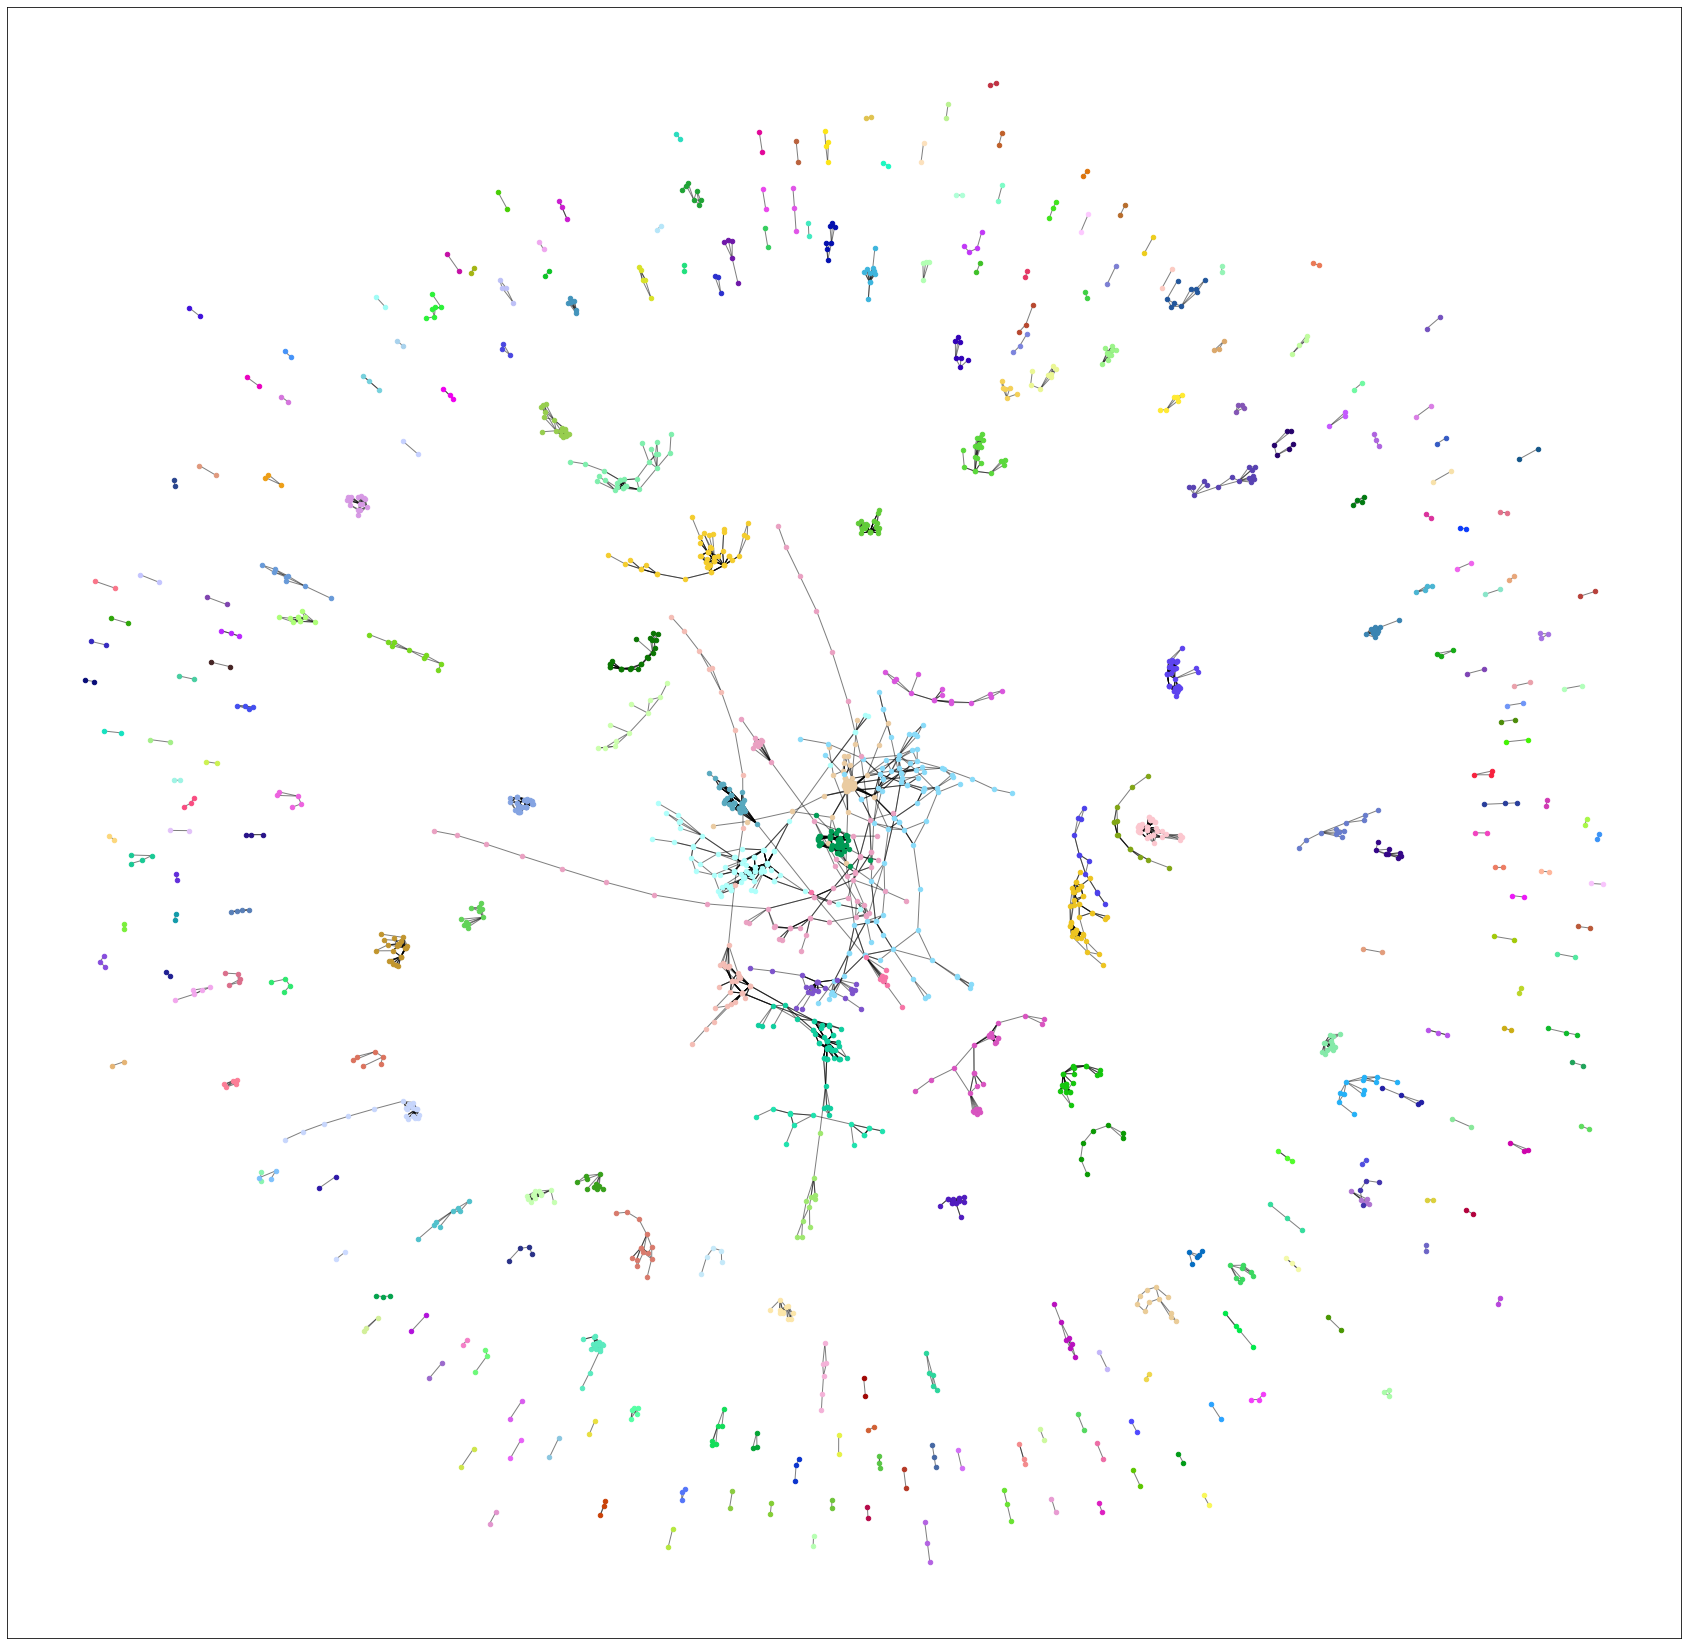

In [324]:
#drawing only nodes with edges
fig = plt.figure()
fig.set_figheight(30)
fig.set_figwidth(30)
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20,
                                node_color = randomcolor.RandomColor().generate()[0])


nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()